In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25

In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,False
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,True
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,False
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,True
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,True
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,True
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,True
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,True


In [5]:
medical_dict = { 1: 0, 2: 1, 3: 1}
df['cholesterol'] = df['cholesterol'].map(medical_dict)
df['gluc'] = df['gluc'].map(medical_dict)

In [6]:
df_cat = pd.melt(
        frame=df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
        id_vars=['cardio']
    )

In [7]:
df_cat = pd.DataFrame(
        df_cat.groupby(
                ['variable', 'value', 'cardio'])['value'].count()).rename(
                columns={'value': 'total'}).reset_index()

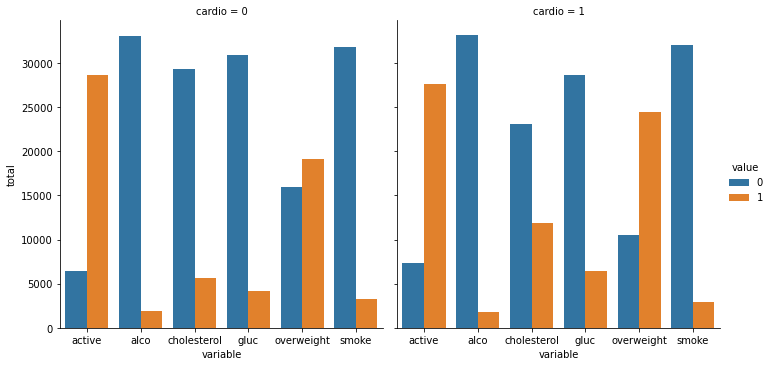

In [8]:
sns.catplot(x='variable', y='total', data=df_cat, hue='value', col='cardio', kind='bar')

<AxesSubplot:>

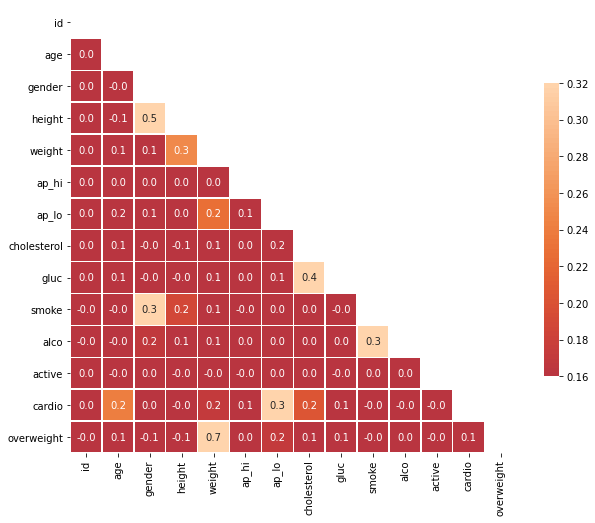

In [9]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 12))

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmin=.16, vmax=.32, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.45, 'format':'%.2f'})